In [1]:
import pandas as pd
import numpy as np
from tkinter import *
from tkinter import filedialog
import os
from matplotlib import pyplot as plt
import xml.etree.ElementTree
import seaborn as sns
import _2D_Utils
import matplotlib
from scipy.signal import *

In [2]:
# tkinter setup
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
%gui tk

In [3]:
# Camera constants
num_pixels = 1024
nm_per_pixel = 0.125
nm_in_half = (num_pixels/2) * nm_per_pixel

In [4]:
xml_file, data_file = _2D_Utils.get_files()
xml_tree = _2D_Utils.get_tree(xml_file)
xml_root = xml_tree.getroot()

In [5]:
# Get scan settings
scan_start, scan_stop, scan_step, nsteps, offset = _2D_Utils.get_params(xml_root)

# Calculate graph center for y-axis, along with min and max (in nm)
fluor_center = _2D_Utils.get_center(scan_start, offset)
fluor_min = fluor_center + nm_in_half
fluor_max = fluor_center - nm_in_half

LIF_pts = np.linspace(scan_start, scan_stop, nsteps)
DF_pts = np.linspace(fluor_min, fluor_max, num_pixels)

# Load data from data_file
data_transposed = _2D_Utils.get_data_transposed(data_file)
data_medfilt = medfilt(data_transposed)

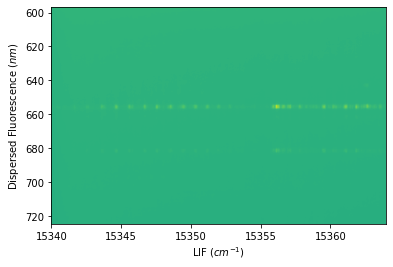

In [6]:
_2D_Utils.show_graph(data_medfilt, scan_start, scan_stop, fluor_min, fluor_max)

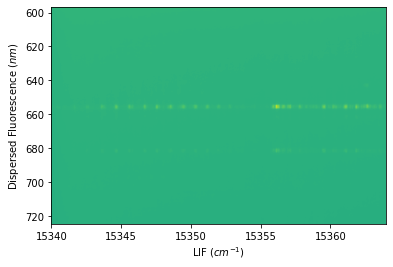

'C:/Users/cniel/Desktop/15340.00-15364.00_0.02_60_1.jpg'

<Figure size 432x288 with 0 Axes>

In [7]:
_2D_Utils.save_image(data_medfilt, scan_start, scan_stop, fluor_min, fluor_max, data_file)

In [8]:
lif = _2D_Utils.LIF_slice(data_medfilt, DF_pts, 650, 670)

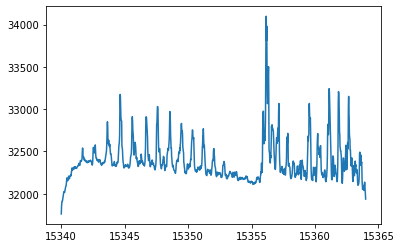

In [9]:
plt.plot(LIF_pts, lif)

In [11]:
df = _2D_Utils.DF_slice(data_medfilt, LIF_pts, 15355, 15358)

In [12]:
peaks = _2D_Utils.get_peaks(df, 500)

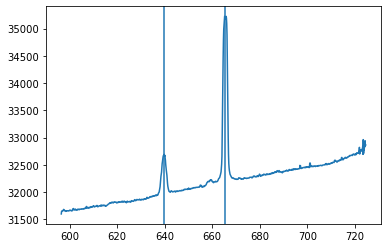

In [13]:
plt.plot(DF_pts, df)
for peak in peaks[0]:
    plt.axvline(x=DF_pts[peak])